# Data Science

## Exercise 01 - Simple data transformations for numeric data

Numeric data can be considered as the simplest data type to deal with in the field of Machine Learning and can be found in price or sensor data. This type of data can be directly applied to any mathematical model due to its format. Feature engineering is still an important factor as we want to get the most information possible out of the underlying data which makes data transformations necessary.
In this exercise you will learn to extract relevant data from a dataset and to transform it in different ways.

## Count

Counts give you an idea of the frequency of different events which can vary greatly in their magnitude, making it harder to get any meaningful predictions from your model. Additionally we often don't need the exact of occurences   so it is often useful 

### Binarization

Binarization is useful to compress counting information whenever the actual count does not matter to our problem or the underlying data are not really comparable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [147]:
df = pd.read_csv("cereal.csv")
df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


Now lets take a closer look at the column "sugars":

min value: -1   max value: 15


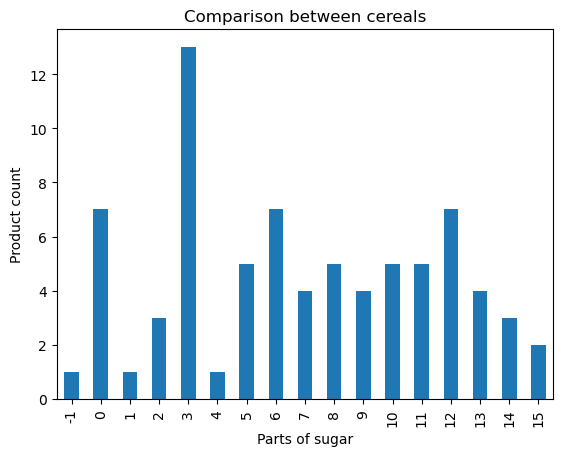

In [4]:
# get min and max value of colum "sugars"
print("min value: {}   max value: {}".format(df['sugars'].min(),df['sugars'].max()))

# take a look at the dataset. In this first example we are focusing on the column "sugars". Using the unaltered data,
# the histogram looks like this:
s = df.groupby("sugars").size()
s.plot(kind="bar")
plt.xlabel("Parts of sugar")
plt.ylabel("Product count")
plt.title("Comparison between cereals")
plt.show()

As can be seen from the plot, most products seem to contain more than 0 parts of sugar. Your task now is to binarize the data so that there is a direct comparison between sugar free and non-sugar free products.
Transform the data in a way so that every value in the "sugars" column either gets a value of 0 or 1 assigned to it.

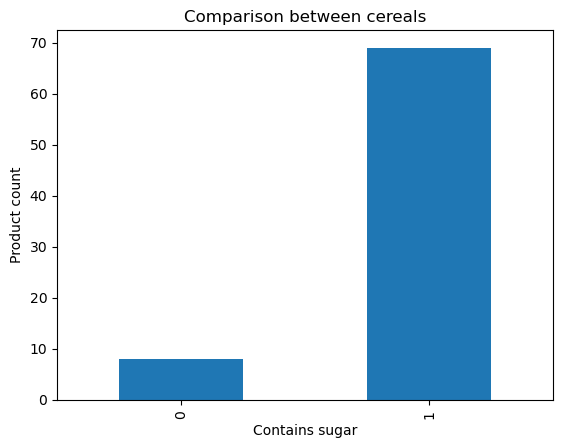

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,1,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,1,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,1,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,1,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,1,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,1,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,1,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,1,110,25,1,1.0,1.00,51.592193


In [33]:
def changeVals(x):
    if x <= 0:
        x = 0
    else:
        x = 1
    return x

# set negative values to 0, every value > 0 to 1
#df['sugars'] = df['sugars'].apply(lambda x: 0 if x <= 0 else 1)
df['sugars'] = df['sugars'].apply(changeVals)

s = df.groupby("sugars").size()
s.plot(kind="bar")
plt.xlabel("Contains sugar")
plt.ylabel("Product count")
plt.title("Comparison between cereals")
plt.show()

### Quantization

If we have numeric values that span serveral orders of magnitude t

#### Fixed-width binning

Each bin contains a specific range, which can be set customly or is automatically segmented.

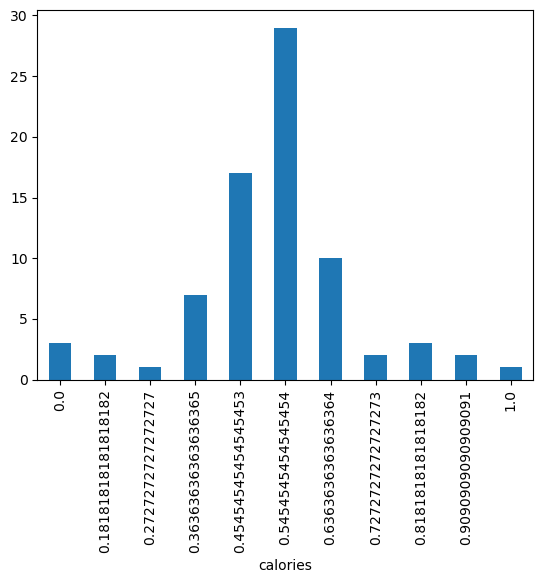

In [47]:
df["calories"]
cals = df.groupby("calories").size()
cals.plot(kind="bar")
plt.show()

One method to bin these values is to look at the data and set the bins manually:

<AxesSubplot:xlabel='binned'>

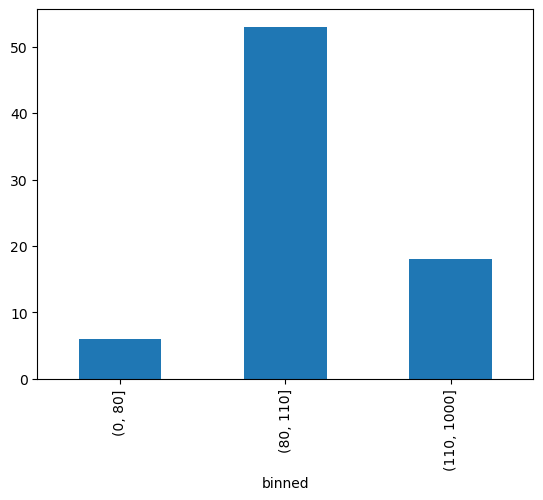

In [119]:
df["binned"] = pd.cut(df["calories"], [0,80,110,1000])
bins = df.groupby("binned").size()
bins.plot(kind="bar")

Another method is to use the min and max values of the respective column and then calculate bins of fixed sizes directly from it:

In [178]:
min_val = df["calories"].min()
max_val = df["calories"].max()
print("min_val: {}    max_val: {}".format(min_val,max_val))

bins = np.linspace(min_val,max_val,6)

min_val: 50    max_val: 160


<AxesSubplot:xlabel='binned'>

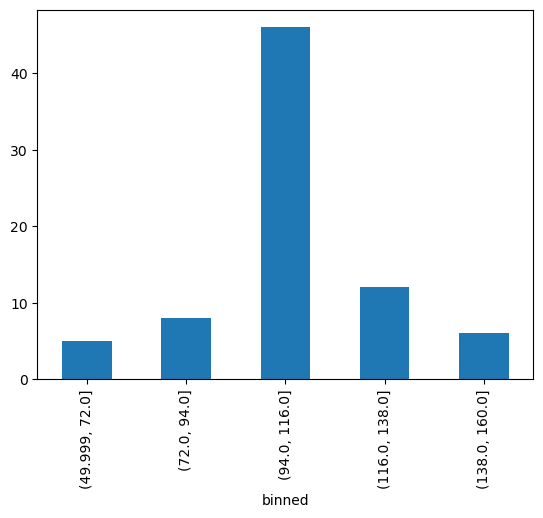

In [200]:
# use pd.cut to bin pandas dataframe, takes the bins defined before
df["binned"] = pd.cut(df["calories"], bins=bins, include_lowest = True)
df.groupby("binned").size().plot(kind="bar")

#### Quantile binning

Another important method is called "quantile binning", which often comes into play when there would be many empty bins otherwise or when there are large gaps in the counts of the single bins. By using this method we can split the data into multiple bins of varying ranges, but with a similar amount of observations per bin.

<AxesSubplot:xlabel='binned2'>

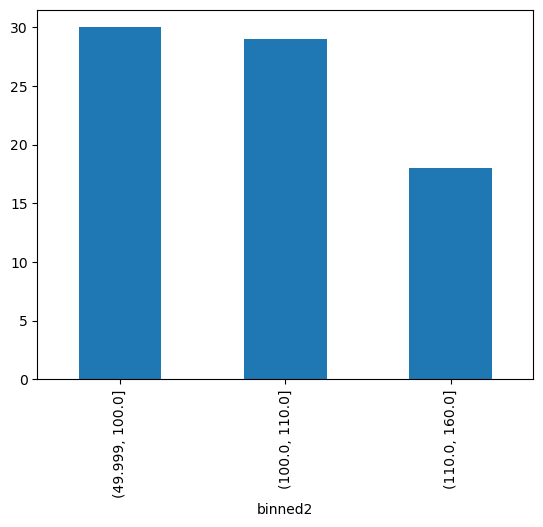

In [209]:
df["binned2"]=pd.qcut(df["calories"], q=3, duplicates='drop')
df.groupby("binned2").size().plot(kind="bar")

In [188]:
deciles = df["calories"].quantile([.1])
print(deciles)

0.7    110.0
Name: calories, dtype: float64


### Log transformations

Whenever the numeric values in your data span multiple magnitudes it is often useful to transform these raw values by using some sort of log transformation. This leads to a compression in the upper ranges, which in turn should be favourable for many machine learning tasks as the values move closer together. This is important as large gaps in the data can otherwise lead to skewed results for the model itself as it has to map the data, independent of their magnitude, to similar results.  

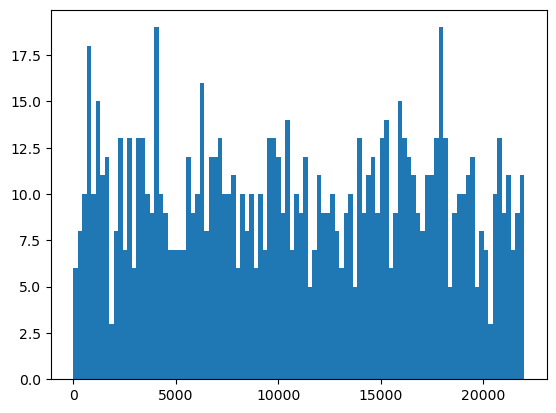

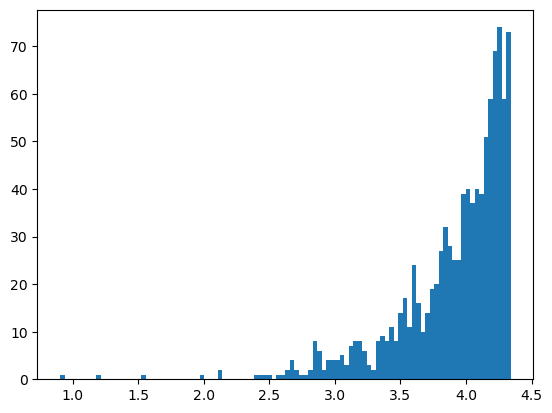

1.041392685158225


8

In [198]:
a = np.random.randint(1,22000,1000)
b = np.log10(a)
plt.hist(a,bins=100)
plt.show()
plt.hist(b,bins=100)
plt.show()


### Feature Scaling / Normalization

One important aspect of numeric features is whether or not they are bounded in their value, meaning that they stay within a certain numeric range. A good example for this would be coordinates as there is no difference in magnitude or scale of the values. On the other hand there are features like counts, distances etc. which can have a huge spread in magnitude and do not have any bounds. The scale of these inputs can affect the performance of many models like Linear Regression etc., so that it is oftentimes necessary to use ___feature scaling___ in order to transform them into a more suitable representation.
It is important to note that feature scaling is usually performed individually for each feature.

#### Min-Max Scaling

Simple method to squeeze all values into a range of [0,1]. This is achieved by using the following formula:

$$
x_{new}=\frac{x-min(x)}{max(x)-min(x)}
$$

Task: Implement function to normalize feature
normalize values of column calories by using lambda function, self-defined function and pandas utility

In [204]:
# Implement function for min-max scaling here
def MinMaxScaling(x,xmin,xmax):
    return (x-xmin)/(xmax-xmin)

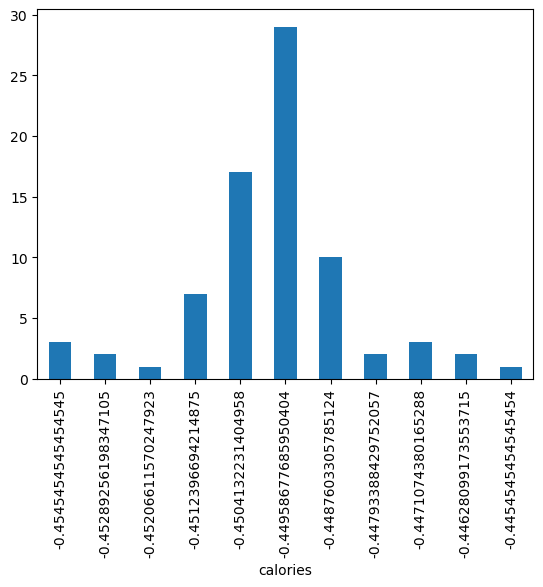

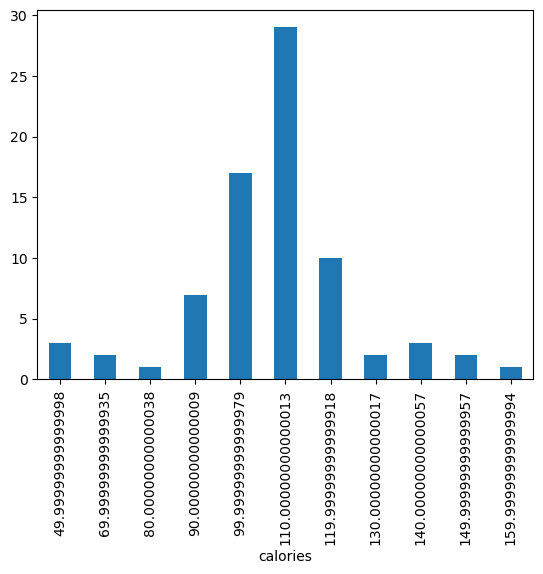

In [205]:
min_calories = df["calories"].min()
max_calories = df["calories"].max()

cals = df.groupby("calories").size()
cals.plot(kind="bar")
plt.show()

# normalize values of column "calories" by using lambda function
df["calories"] = df["calories"].apply(lambda x:(x-min_calories)/(max_calories-min_calories))

# normalize values of column "calories" by using defined function
df["calories"] = df["calories"].apply(MinMaxScaling,xmin=min_calories,xmax=max_calories)

cals = df.groupby("calories").size()
cals.plot(kind="bar")
plt.show()

#### Standardization

This scaling technique is especially helpful when the underlying data follows a Gaussian distribution. It centers the values around a 0 mean with a standard deviation of 1, thus scaling the variance. The formula for this method is defined as:

$$
x_{new}=\frac{x-mean(x)}{sqrt(var(x))}=\frac{x-mean(x)}{stdev(x)}
$$

Task: Standardize column

In [206]:
# implement function here
def Standardize(x,mean_x,stdev_x):
    return (x-mean_x)/stdev_x

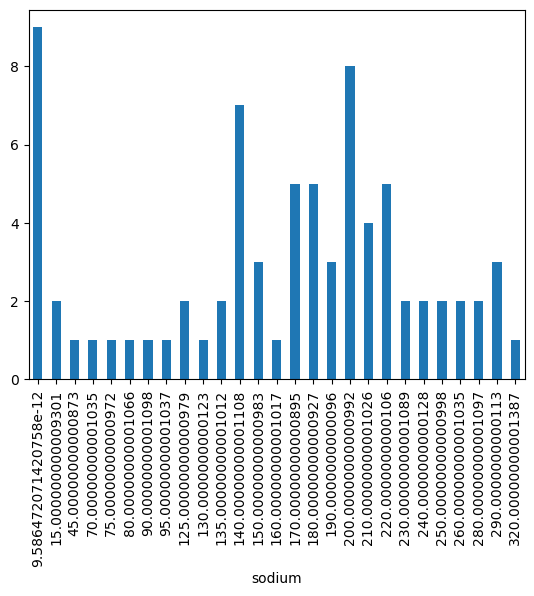

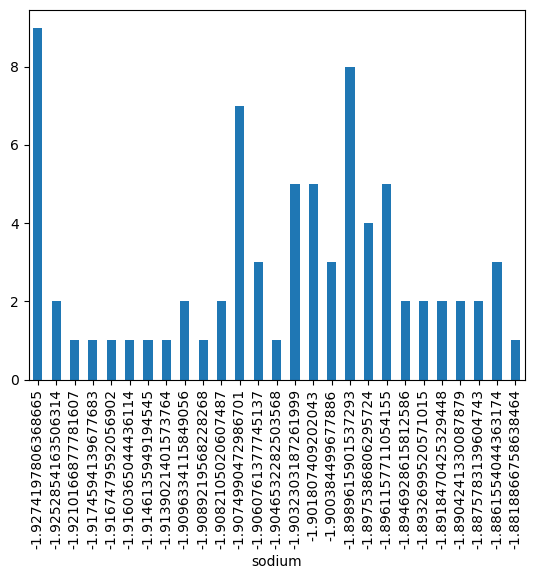

In [207]:
meanx = df["sodium"].mean()
stdevx = df["sodium"].std()

cals = df.groupby("sodium").size()
cals.plot(kind="bar")
plt.show()

# normalize values of column "sodium" by using lambda function
df["sodium"] = df["sodium"].apply(lambda x:(x-meanx)/stdevx)
 
# normalize values of column "sodium" by using defined function
df["sodium"] = df["sodium"].apply(Standardize,mean_x=meanx,stdev_x=stdevx)


cals = df.groupby("sodium").size()
cals.plot(kind="bar")
plt.show()

<AxesSubplot:xlabel='calories'>

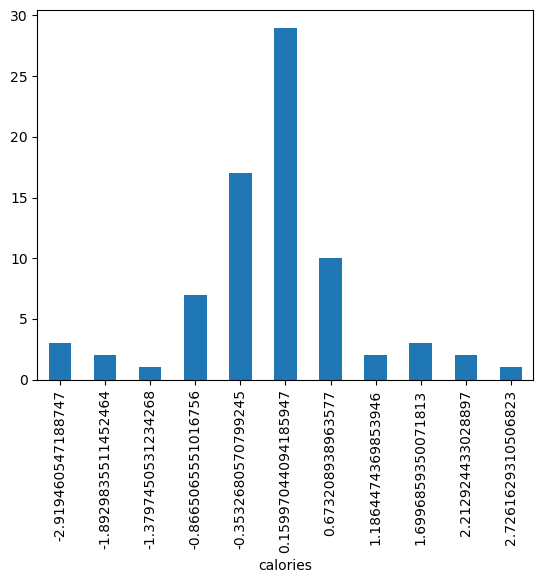

In [208]:
meanx = df["calories"].mean()
stdevx = df["calories"].std()

df["calories"] = df["calories"].apply(Standardize,mean_x=meanx,stdev_x=stdevx)
cals = df.groupby("calories").size()
cals.plot(kind="bar")

#### l² normalization

In this case, the original values are divided by the ___l² norm___ (Euclidean norm) which measures the length of the feature vector. This norm is derived from the Pythagorean theorem and defined as follows:

$$
||x||_2=\sqrt{x_1²+x_2²+...+x_m²}
$$

This norm is then applied by the following formula to normalize a specific column in the dataset:

$$
x_{new}=\frac{x}{||x||_2}
$$

Task: Implement a function that uses l2 normalization to normalize the column "calories"

![title](img/l2norm.png)

In [209]:
# implement l2 normalization formula
def L2_Normalize(x,l2norm):
    return x/l2norm

In [210]:
# implement l2 norm calculation
def CalcL2Norm(x_vector):
    return np.sqrt(sum(x_vector*x_vector))

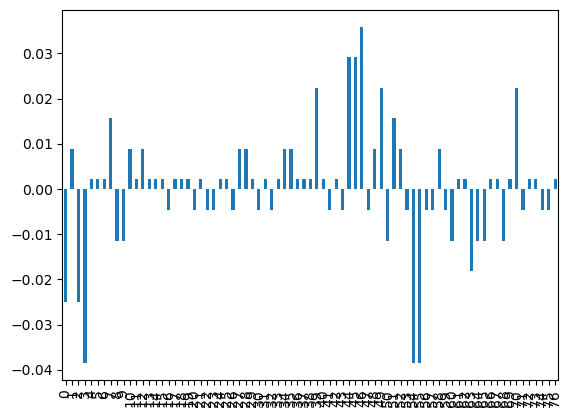

In [214]:
l2norm=CalcL2Norm(df["calories"])

# with lambda function
df["calories"] = df["calories"].apply(lambda x: x/l2norm)

# with defined function
df["calories"] = df["calories"].apply(L2_Normalize,l2norm=l2norm)


df["calories"].plot(kind="bar")
plt.show()

### Interaction Features

While a simple linear model uses a linear combination of the individual features, it is sometimes helpful to further combine these features. This leads to interactions between them and can improve results of the model.
Your task in this exercise is to implement a pipeline which takes certain features ("calories","protein","fat","carbo","sugars") from our dataset and uses a linear regression model to predict the "rating" column. You should preprocess the data by using the functions implemented above. Furthermore you should use sklearn to create the interaction features and compare the results of the model to the one trained without them.

Useful functions from sklearn:
        - sklearn.linear_model.LinearRegression()
        - sklearn.preprocessing.PolynomialFeatures(include_bias=False).fit_transform(X)

In [212]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [213]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

def evaluate_rscore(X_train, X_test, y_train, y_test):
    model = linear_model.LinearRegression().fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return (model, score)

features = ["calories","protein","fat","carbo","sugars"]

df2 = df.copy()

# apply MinMaxScaling to selected features
#for feat in features:
#    df2[feat] = df2[feat].apply(MinMaxScaling,xmin=df2[feat].min(),xmax=df2[feat].max())

# apply standardization to selected features
for feat in features:
    df2[feat] = df2[feat].apply(Standardize,mean_x=df2[feat].mean(),stdev_x=df2[feat].std())

X = df2[features]
y = df2[["rating"]]

# make features interact with each other
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X,X2,y,test_size=0.2, random_state=2564)

(model1, r1) = evaluate_rscore(X1_train,X1_test,y_train,y_test)
(model2, r2) = evaluate_rscore(X2_train,X2_test,y_train,y_test)

print("R-squared score without feature interaction: %0.5f" % r1)
print("R-squared score with feature interaction: %0.5f" % r2)

R-squared score without feature interaction: 0.52711
R-squared score with feature interaction: 0.80179
